# K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
%matplotlib inline

import kmeans

__Load data__

In [2]:
data = np.loadtxt('testSet.txt')
print('Number of samples: {}, Dimension: {}'.format(data.shape[0], data.shape[1]))

Number of samples: 80, Dimension: 2


__Visualize data__

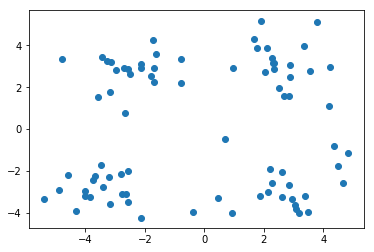

In [3]:
plt.scatter(data[:, 0], data[:, 1])

## 实现

### 原始实现

__Cluster data__

In [13]:
K = 4
centroids, cluster, iterations = kmeans.Kmeans(data, K)
print('Iterations: {}'.format(iterations))

Iterations: 4


__Visualize result__

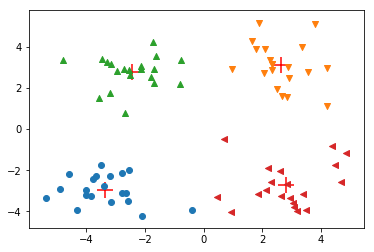

In [14]:
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='r', marker='+')
plt.scatter(data[cluster==0, 0], data[cluster==0, 1], marker='o')
plt.scatter(data[cluster==1, 0], data[cluster==1, 1], marker='v')
plt.scatter(data[cluster==2, 0], data[cluster==2, 1], marker='^')
plt.scatter(data[cluster==3, 0], data[cluster==3, 1], marker='<')

### Scikit-learn实现

__Cluster data__

In [6]:
K = 4
k_means = sklearn.cluster.KMeans(n_clusters=K)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

__Visualize result__

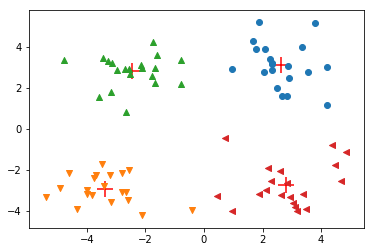

In [7]:
centroids = k_means.cluster_centers_
cluster = k_means.labels_
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='r', marker='+')
plt.scatter(data[cluster==0, 0], data[cluster==0, 1], marker='o')
plt.scatter(data[cluster==1, 0], data[cluster==1, 1], marker='v')
plt.scatter(data[cluster==2, 0], data[cluster==2, 1], marker='^')
plt.scatter(data[cluster==3, 0], data[cluster==3, 1], marker='<')

## K的选择

In [8]:
import gap

### 手肘法

#### 原始Kmeans算法

[1465.58002348  792.91685654  463.64968092  149.95430468  134.4631444
  125.50155592  112.80725193   93.66518239   98.69209999]


Text(0,0.5,'Wk')

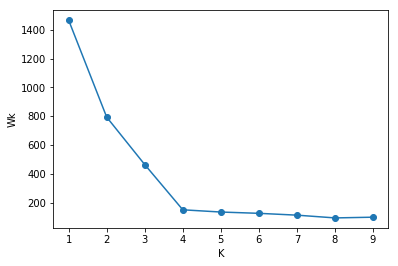

In [17]:
max_K = 10
K_range = np.arange(1, max_K, dtype=int)
wks = np.zeros(len(K_range))
for i, K in enumerate(K_range):
    centroids, cluster, iterations = kmeans.Kmeans(data, K)
    wks[i] = gap.calculate_Wk(data, centroids, cluster)
print(wks)

plt.plot(K_range, wks, 'o-')
plt.xlabel('K')
plt.ylabel('Wk')

#### Scikit-lean实现的Kmeans算法

[1465.58002348  792.91685654  405.13810196  149.95430468  123.99203711
  110.14571036   92.39469368   84.81694542   72.38360403]


Text(0,0.5,'Wk')

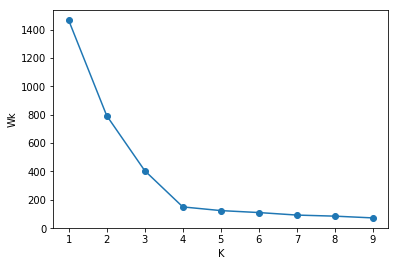

In [16]:
max_K = 10
K_range = np.arange(1, max_K, dtype=int)
wks = np.zeros(len(K_range))
for i, K in enumerate(K_range):
    k_means = sklearn.cluster.KMeans(n_clusters=K)
    k_means.fit(data)
    centroids = k_means.cluster_centers_
    cluster = k_means.labels_
    wks[i] = gap.calculate_Wk(data, centroids, cluster)
print(wks)

plt.plot(K_range, wks, 'o-')
plt.xlabel('K')
plt.ylabel('Wk')

### Gap Statistic

#### 原始Kmeans算法

Select K: 4
Gaps Diff: [ 0.05778518  0.10366695 -0.7057111   0.23133357  0.08811658  0.38063123
 -0.07232227  0.18780347]


<BarContainer object of 8 artists>

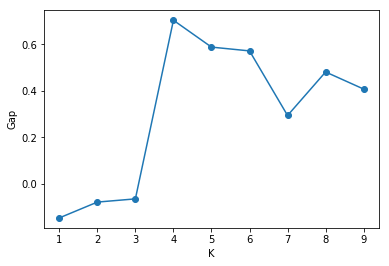

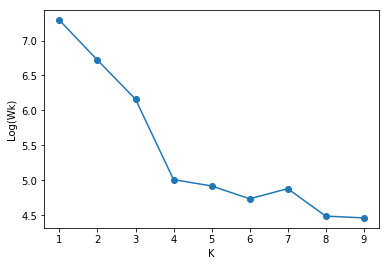

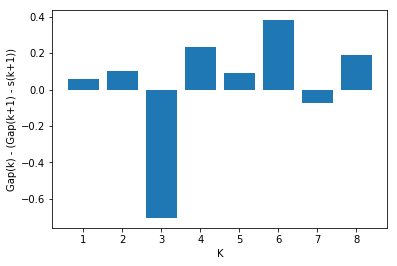

In [11]:
max_K = 10
B = 10
K_range = np.arange(1, max_K, dtype=int)
gaps, stds, log_wks = gap.gap_statistic(data, max_K, B, kmeans.Kmeans)

num_gaps = len(gaps) - 1
gaps_diff = np.zeros(num_gaps)
for i in range(num_gaps):
    gaps_diff[i] = gaps[i] - (gaps[i+1] - stds[i+1])

select_K = K_range[np.argmax(gaps)]
print('Select K: {}'.format(select_K))
print('Gaps Diff: {}'.format(gaps_diff))

plt.plot(K_range, gaps, 'o-')
plt.xlabel('K')
plt.ylabel('Gap')

plt.figure()
plt.plot(K_range, log_wks, 'o-')
plt.xlabel('K')
plt.ylabel('Log(Wk)')

plt.figure()
plt.xlabel('K')
plt.ylabel('Gap(k) - (Gap(k+1) - s(k+1))')
plt.bar(K_range[:num_gaps], gaps_diff)

#### Scikit-lean实现的Kmeans算法

Select K: 4
Gaps Diff: [ 0.02476904 -0.07249637 -0.5252799   0.10438411  0.1672094   0.08252028
  0.08921042  0.02291316]


<BarContainer object of 8 artists>

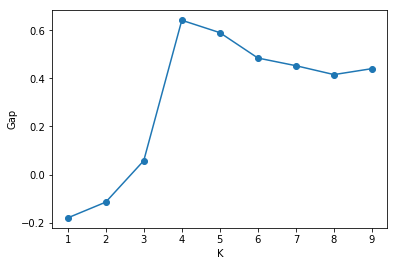

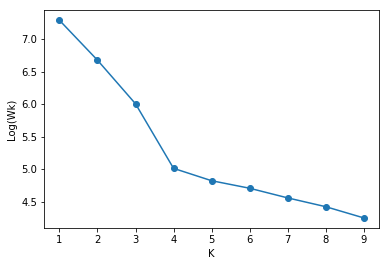

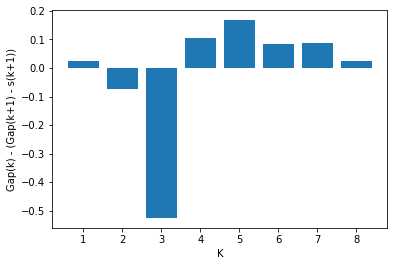

In [12]:
def sklearn_kmeans_wrapper(data, K):
    k_means = sklearn.cluster.KMeans(n_clusters=K)
    k_means.fit(data)
    return k_means.cluster_centers_, k_means.labels_, None

max_K = 10
B = 10
K_range = np.arange(1, max_K, dtype=int)
gaps, stds, log_wks = gap.gap_statistic(data, max_K, B, sklearn_kmeans_wrapper)

num_gaps = len(gaps) - 1
gaps_diff = np.zeros(num_gaps)
for i in range(num_gaps):
    gaps_diff[i] = gaps[i] - (gaps[i+1] - stds[i+1])

select_K = K_range[np.argmax(gaps)]
print('Select K: {}'.format(select_K))
print('Gaps Diff: {}'.format(gaps_diff))

plt.plot(K_range, gaps, 'o-')
plt.xlabel('K')
plt.ylabel('Gap')

plt.figure()
plt.plot(K_range, log_wks, 'o-')
plt.xlabel('K')
plt.ylabel('Log(Wk)')

plt.figure()
plt.xlabel('K')
plt.ylabel('Gap(k) - (Gap(k+1) - s(k+1))')
plt.bar(K_range[:num_gaps], gaps_diff)